In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dataset=pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/non_linear_regression.csv")

In [14]:
dataset.head(3)

,Age,Experience,Salary
0,58,13,701136
1,48,39,1773631
2,34,21,573885


In [15]:
dataset.shape

(1000, 3)

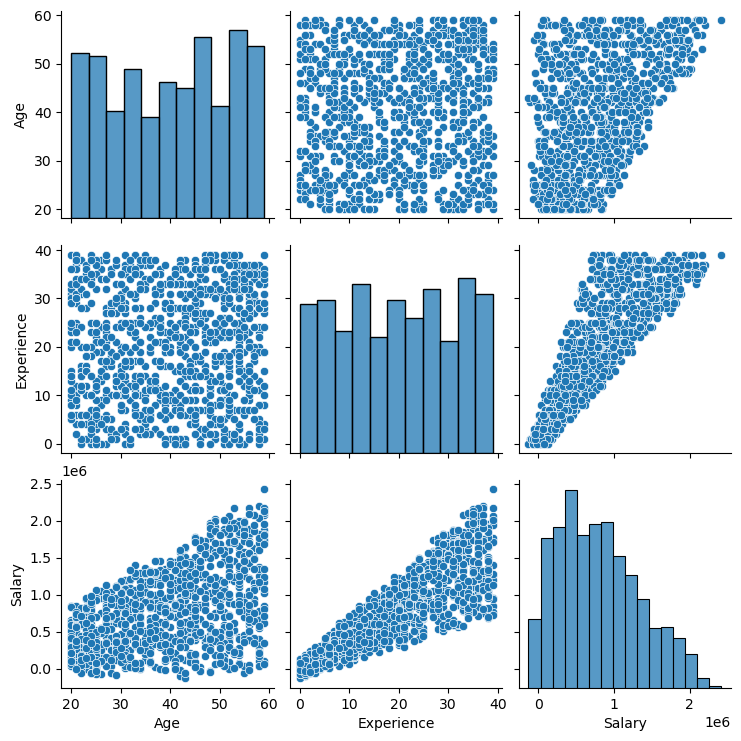

In [16]:
sns.pairplot(data=dataset)
plt.show()

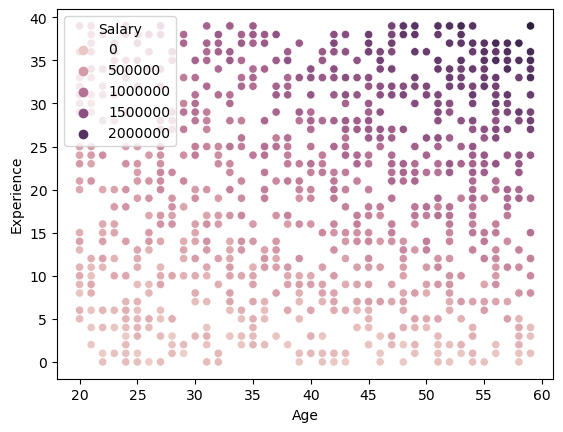

In [17]:
sns.scatterplot(x="Age",y="Experience",data=dataset,hue="Salary")
plt.show()

In [18]:
dataset.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

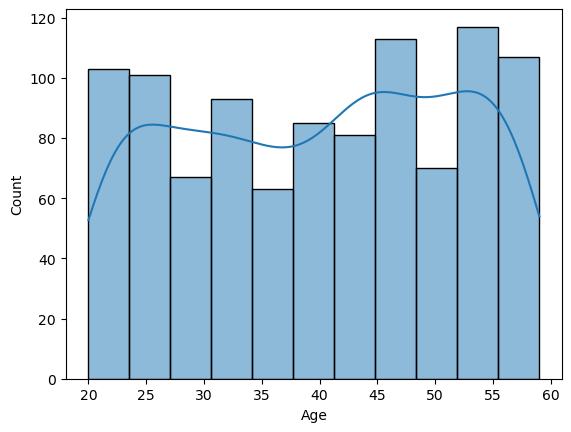

In [19]:
sns.histplot(dataset["Age"],kde=True)
plt.show()

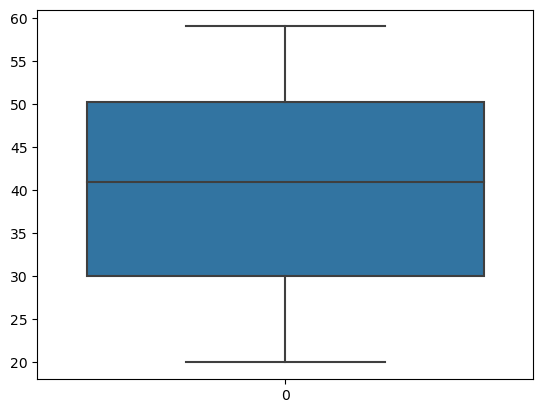

In [20]:
sns.boxplot(dataset["Age"])
plt.show()

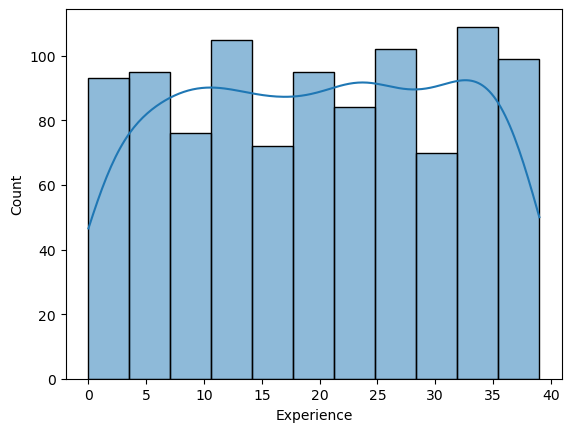

In [21]:
sns.histplot(dataset["Experience"],kde=True)
plt.show()

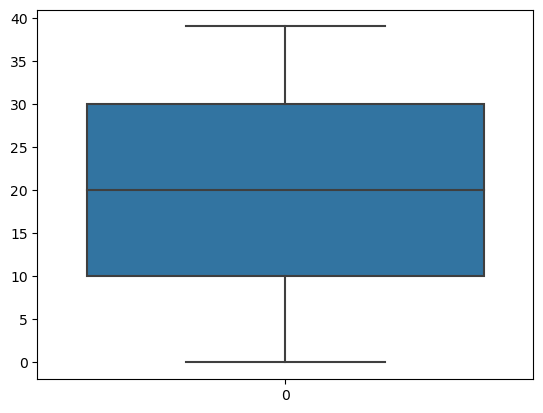

In [22]:
sns.boxplot(dataset["Experience"])
plt.show()

In [23]:
x=dataset.iloc[:,:-1]
y=dataset["Salary"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [27]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [29]:
dtr.score(x_test,y_test)*100,dtr.score(x_train,y_train)*100

(94.96457513834157, 99.4876911974208)

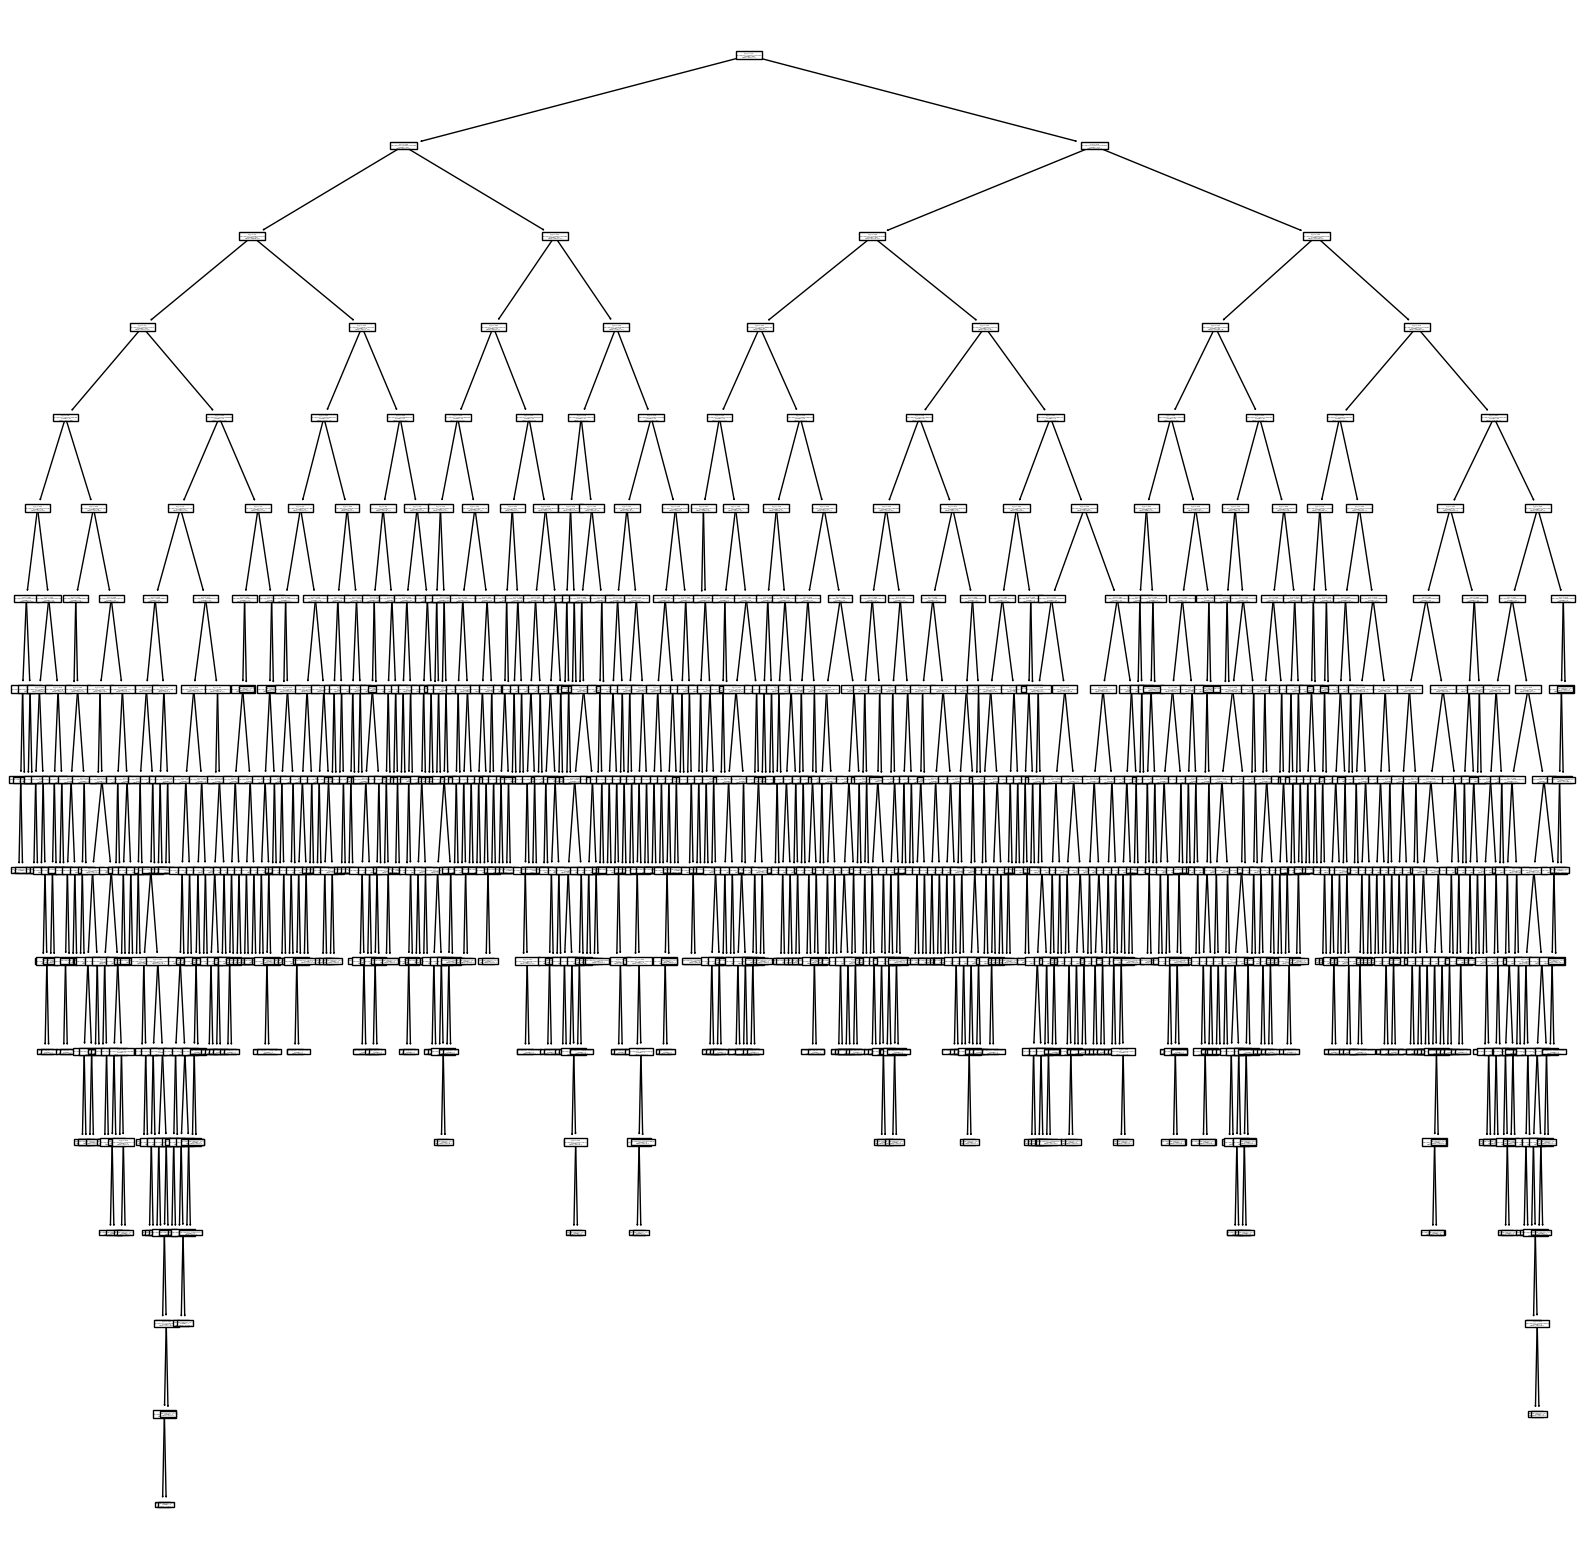

In [33]:
plt.figure(figsize=(20,20))
plot_tree(dtr)
plt.show()

In [38]:
y_pred=dtr.predict(x)

In [40]:
x_test[20:24]

,Age,Experience
549,46,7
174,21,11
371,45,37
527,32,36


In [41]:
y_test[20:24]

549     461750
174     125014
371    1750841
527    1210475
Name: Salary, dtype: int64

In [42]:
dtr.predict([[46,7]])

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([395893.])

In [43]:
dtr.predict([[45,37]])

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1777770.])

In [44]:
dtr.predict([[22,0]])

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([51165.])

In [45]:
dtr.predict([[24,0]])

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([103593.])

In [46]:
dtr.predict([[32,36]])

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1202509.])

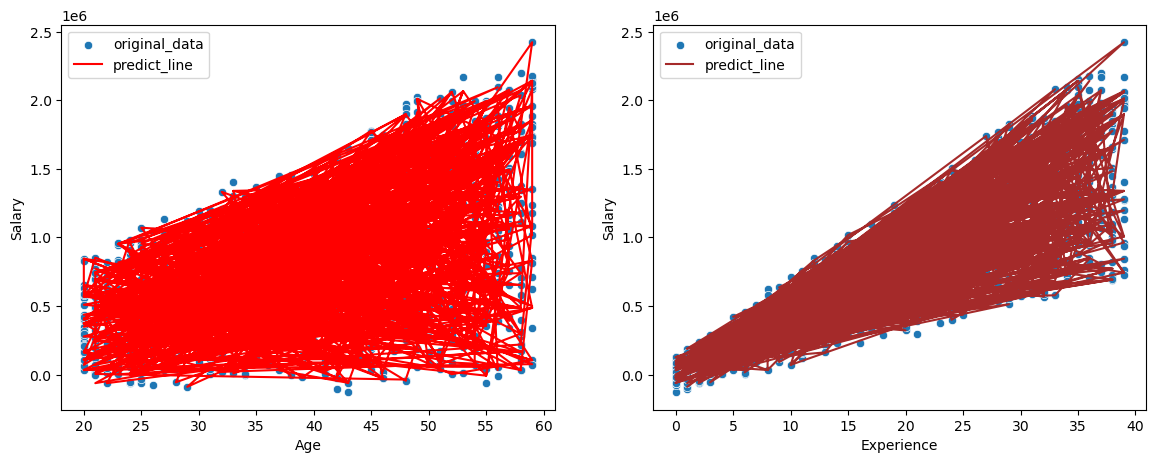

In [39]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(x="Age", y="Salary", data=dataset)
plt.plot(dataset["Age"],y_pred,c="r")
plt.legend(["original_data", "predict_line"])

plt.subplot(1,2,2)
sns.scatterplot(x="Experience", y="Salary", data=dataset)
plt.plot(dataset["Experience"], y_pred, c="brown")
plt.legend(["original_data", "predict_line"])
plt.show()